# Немного про скорость
- numpy
- python
- pandas

In [1]:
import numpy as np
from random import random

### Задача 1
Просто посчитать сумму чисел

In [2]:
data = list(range(10**6))

In [3]:
data[:5]

[0, 1, 2, 3, 4]

Однократное вычисление

In [4]:
%%time

total_sum = 0

for num in data:
    total_sum += num
    
total_sum

CPU times: user 97.1 ms, sys: 2.04 ms, total: 99.1 ms
Wall time: 97.8 ms


499999500000

In [5]:
%%time

sum(data)

CPU times: user 5.85 ms, sys: 58 µs, total: 5.9 ms
Wall time: 5.92 ms


499999500000

Тест скорости

In [6]:
%%time

for _ in range(10**3):  # _ - это намек, что переменная в цикле НЕ используется
    result = sum(data)

CPU times: user 5.49 s, sys: 24.4 ms, total: 5.52 s
Wall time: 5.55 s


In [11]:
_

677

Еще вариант

In [7]:
%%timeit

sum(data)

5.49 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Пробуем с массивом numpy

In [8]:
data = np.arange(10**6)
data[:5]

array([0, 1, 2, 3, 4])

# Профилировщик
- PyCharm
- VS code

In [9]:
%%time

for _ in range(10**3):
    result = np.sum(data)

CPU times: user 545 ms, sys: 3.46 ms, total: 549 ms
Wall time: 549 ms


In [10]:
%%time

for _ in range(10**3):
    result = sum(data)

KeyboardInterrupt: 

### Задача 2
Веревку длиной 1 метр разрезают в двух случайных местах. С какой вероятностью длина самого большого отрезка окажется более 50 сантиметров?
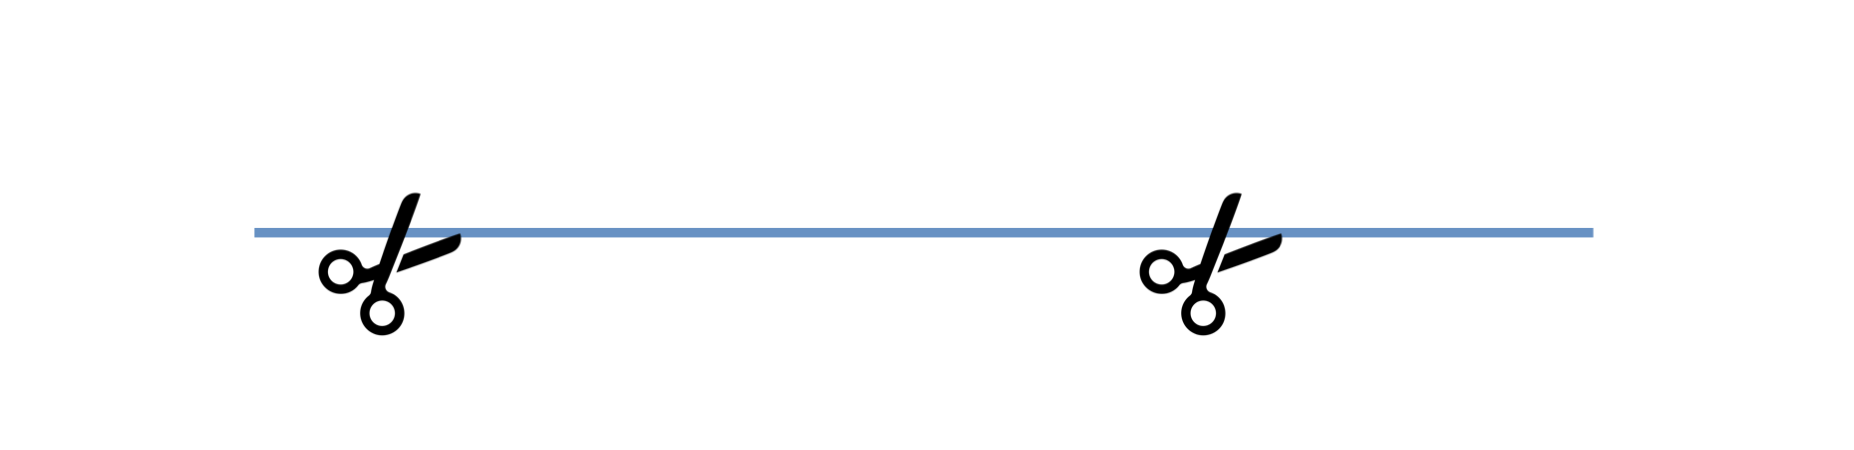

In [14]:
from random import random

In [22]:
first = random()
second = random()

first, second

(0.5976711992032095, 0.9661842897029447)

In [ ]:
left_cut = min(first, second)
right_cut = max(first, second)

In [ ]:
if left_cut > 0.5
if right_cut - left_cut > 0.5
if right_cut < 0.5

In [32]:
%%time

N_ATTEMPTS = 10**7
success_count = 0

for _ in range(N_ATTEMPTS):
    first_cut = random()
    second_cut = random()
    
    left_cut = min(first_cut, second_cut)  # позиция левого надреза
    right_cut = max(first_cut, second_cut)  # позиция правого надреза
    
    if (
        left_cut >= 0.5 or  # левый кусок больше 50см
        right_cut - left_cut >= 0.5 or  # кусок между надрезами больше 50см
        1-right_cut >= 0.5  # правый кусок больше 50см
    ):
        success_count += 1
        
print(success_count / N_ATTEMPTS)

0.7501787
CPU times: user 5.91 s, sys: 35.4 ms, total: 5.95 s
Wall time: 5.96 s


Пробуем с помощью numpy

In [24]:
np.random.random(10)

array([0.75778293, 0.8903409 , 0.37658031, 0.77807423, 0.58180176,
       0.71740072, 0.27533437, 0.76562725, 0.57958218, 0.77943997])

In [28]:
first_cut = np.random.random(10)
first_cut

array([0.13294801, 0.77226362, 0.85692282, 0.29534272, 0.36666038,
       0.37564865, 0.97125546, 0.43806988, 0.29694839, 0.83192201])

In [29]:
# np.where(условие, что подставить, когда условие выполнено, когда условие НЕ выполнено)

np.where(first_cut > 0.5, 1, 0)

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [26]:
first_cut = np.random.random(10**7)

In [27]:
first_cut.__sizeof__()

80000096

In [30]:
%%time

first_cut = np.random.random(10**7)
second_cut = np.random.random(10**7)

sum(np.where(
    ((first_cut < 0.5) & (second_cut < 0.5)) |   # | or, & and
    ((first_cut > 0.5) & (second_cut > 0.5)) |
    (abs(first_cut - second_cut) > 0.5), 
    1, 0)) / 10**7

CPU times: user 1.6 s, sys: 90.3 ms, total: 1.69 s
Wall time: 1.69 s


0.7499787

In [ ]:
# multiprocessing  Thread
# asyncio - асинхронные вычисления

# Метрики схожести текстов

Расстояние Хемминга - число различающихся символов (у строк одинакового размера)

In [33]:
signal_1 = '010010100101010101101011101010100101'
signal_2 = '010110100101011101110011101010100101'

In [34]:
hamming_dist = 0

for i, number in enumerate(signal_1):
    if number != signal_2[i]:
        hamming_dist += 1
        
print(hamming_dist)

4


Расстояние Левенштейна

In [35]:
import Levenshtein

In [36]:
Levenshtein.distance('иванов', 'петров')

4

In [37]:
voice_transcription = 'Романова'  # результат расшифровки голоса

In [38]:
team = ['Мединская', 'Лучникова', 'Шереметьева', 'Разгуляева', 'Романовская']  # список настоящих фамилий

In [39]:
sorted([(name, Levenshtein.distance(name, voice_transcription)) for name in team], key=lambda x: x[1])

[('Романовская', 3),
 ('Лучникова', 6),
 ('Мединская', 7),
 ('Разгуляева', 7),
 ('Шереметьева', 8)]

# Word2vec

- google --> пщщпду
- однушка --> однокомнатная квартира

[Пример](https://ai.intelligentonlinetools.com/ml/k-means-clustering-example-word2vec/) использования

In [40]:
import word2vec

In [ ]:
# построение модели
# word2vec.word2vec('keywords_only.csv', 'keywords.bin', size=100, binary=True, verbose=True)

In [41]:
model = word2vec.load('keywords.bin')

In [42]:
model.vectors.shape

(5110, 100)

In [43]:
model.distance('доллар', 'курс', 'новости', 'exist')

[('доллар', 'курс', 0.9418648979417067),
 ('доллар', 'новости', 0.961252865976364),
 ('доллар', 'exist', 0.7393588306142083),
 ('курс', 'новости', 0.9320686871264429),
 ('курс', 'exist', 0.8172263099993266),
 ('новости', 'exist', 0.7475044615162911)]

In [44]:
indexes, metrics = model.similar('вконтакте')
model.generate_response(indexes, metrics).tolist()

[('фейсбук', 0.9973144427134036),
 ('реклама', 0.9967488335032968),
 ('контакт', 0.9937352354865503),
 ('gmail', 0.9913932694292359),
 ('одноклассники', 0.9911915278087111),
 ('мою', 0.988450608859537),
 ('odnoklassniki', 0.9882130270998799),
 ('майл', 0.9866659658020683),
 ('госуслуги', 0.9865898596239959),
 ('vk', 0.985478288550912)]

In [45]:
indexes, metrics = model.similar('замок')
model.generate_response(indexes, metrics).tolist()

[('дикого', 0.9660463414472039),
 ('дочь', 0.9654834067319502),
 ('перси', 0.9645626335378448),
 ('запада', 0.9634953006784215),
 ('одна', 0.9626509379556154),
 ('синий', 0.9625325953575207),
 ('папины', 0.9622590861211784),
 ('поли', 0.9617913888840744),
 ('мастер', 0.9613913633302174),
 ('зеленый', 0.9612019929452926)]

In [46]:
indexes, metrics = model.similar('фильм')
model.generate_response(indexes, metrics).tolist()

[('иллюзия', 0.9746920189283443),
 ('обмана', 0.9739505786654822),
 ('союзники', 0.9726426792215386),
 ('механик', 0.9708741631776523),
 ('возвращайся', 0.9658919454200058),
 ('воскрешение', 0.9658354453664477),
 ('кредо', 0.9636937079052321),
 ('омерзительная', 0.9615733713655767),
 ('всех', 0.9599216386354856),
 ('серого', 0.9594825853024929)]